# Sales Analysis

In [261]:
# Imports
import pandas as pd
import functions as fc
import matplotlib.pyplot as plt

# Read input file
sales_frame = fc.read_csv("data/nyc-rolling-sales.csv")


# Dropping some unnecessary information
sales_frame = sales_frame.drop(["Unnamed: 0"], axis=1)
fc.to_csv("data/nyc-rolling-sales1.csv", sales_frame)
# Printing head of the Data Frame
#print(sales_frame.head())

# Data Types of the Data Frame pre changing
#print(sales_frame.dtypes)

# Changing format of boroughs to string (from int)
sales_frame["BOROUGH"] = sales_frame["BOROUGH"].apply(str)
# Changing format of sale price to numeric (from str)
sales_frame["SALE PRICE"] = pd.to_numeric(sales_frame["SALE PRICE"], errors="coerce")
# Changing format of sale date to datetime (from str)
sales_frame["SALE DATE"] = pd.to_datetime(sales_frame["SALE DATE"], errors="coerce")

# Replacing numbers of boroughs with actual name
sales_frame["BOROUGH"] = sales_frame["BOROUGH"].replace(["1"], "Manhattan")
sales_frame["BOROUGH"] = sales_frame["BOROUGH"].replace(["2"], "Brooklyn")
sales_frame["BOROUGH"] = sales_frame["BOROUGH"].replace(["3"], "Queens")
sales_frame["BOROUGH"] = sales_frame["BOROUGH"].replace(["4"], "The Bronx")
sales_frame["BOROUGH"] = sales_frame["BOROUGH"].replace(["5"], "Staten Island")

# Printing head of the Data Frame
#print(sales_frame.head())

# Data Types of the Data Frame post changing
print(sales_frame.dtypes)

BOROUGH                                   object
NEIGHBORHOOD                              object
BUILDING CLASS CATEGORY                   object
TAX CLASS AT PRESENT                      object
BLOCK                                      int64
LOT                                        int64
EASE-MENT                                 object
BUILDING CLASS AT PRESENT                 object
ADDRESS                                   object
APARTMENT NUMBER                          object
ZIP CODE                                   int64
RESIDENTIAL UNITS                          int64
COMMERCIAL UNITS                           int64
TOTAL UNITS                                int64
LAND SQUARE FEET                          object
GROSS SQUARE FEET                         object
YEAR BUILT                                 int64
TAX CLASS AT TIME OF SALE                  int64
BUILDING CLASS AT TIME OF SALE            object
SALE PRICE                               float64
SALE DATE           

## Sales per Year

In [262]:
# Calculating the start and end date of the data frame
sales_beg = sales_frame["SALE DATE"].min()
sales_end = sales_frame["SALE DATE"].max()
sales_total = len(sales_frame)
print("The sales projected in the data frame were made between the ", sales_beg, " and ", sales_end, ".", sep="")
print("The total amount of property sales made in the period were ", sales_total, ".", sep="")

The sales projected in the data frame were made between the 2016-09-01 00:00:00 and 2017-08-31 00:00:00.
The total amount of property sales made in the period were 84548.


## Visualizations

       BOROUGH                      BUILDING CLASS CATEGORY  VALUE COUNTS
0     Brooklyn  02 TWO FAMILY DWELLINGS                              1909
1     Brooklyn  01 ONE FAMILY DWELLINGS                              1358
2     Brooklyn  10 COOPS - ELEVATOR APARTMENTS                        996
3     Brooklyn  03 THREE FAMILY DWELLINGS                             747
4     Brooklyn  07 RENTALS - WALKUP APARTMENTS                        464
..         ...                                          ...           ...
187  The Bronx  38 ASYLUMS AND HOMES                                    4
188  The Bronx  23 LOFT BUILDINGS                                       1
189  The Bronx  25 LUXURY HOTELS                                        1
190  The Bronx  34 THEATRES                                             1
191  The Bronx  36 OUTDOOR RECREATIONAL FACILITIES                      1

[192 rows x 3 columns]
         BOROUGH     SALE PRICE
1      Manhattan 48196678399.00
2         Queens 2006694

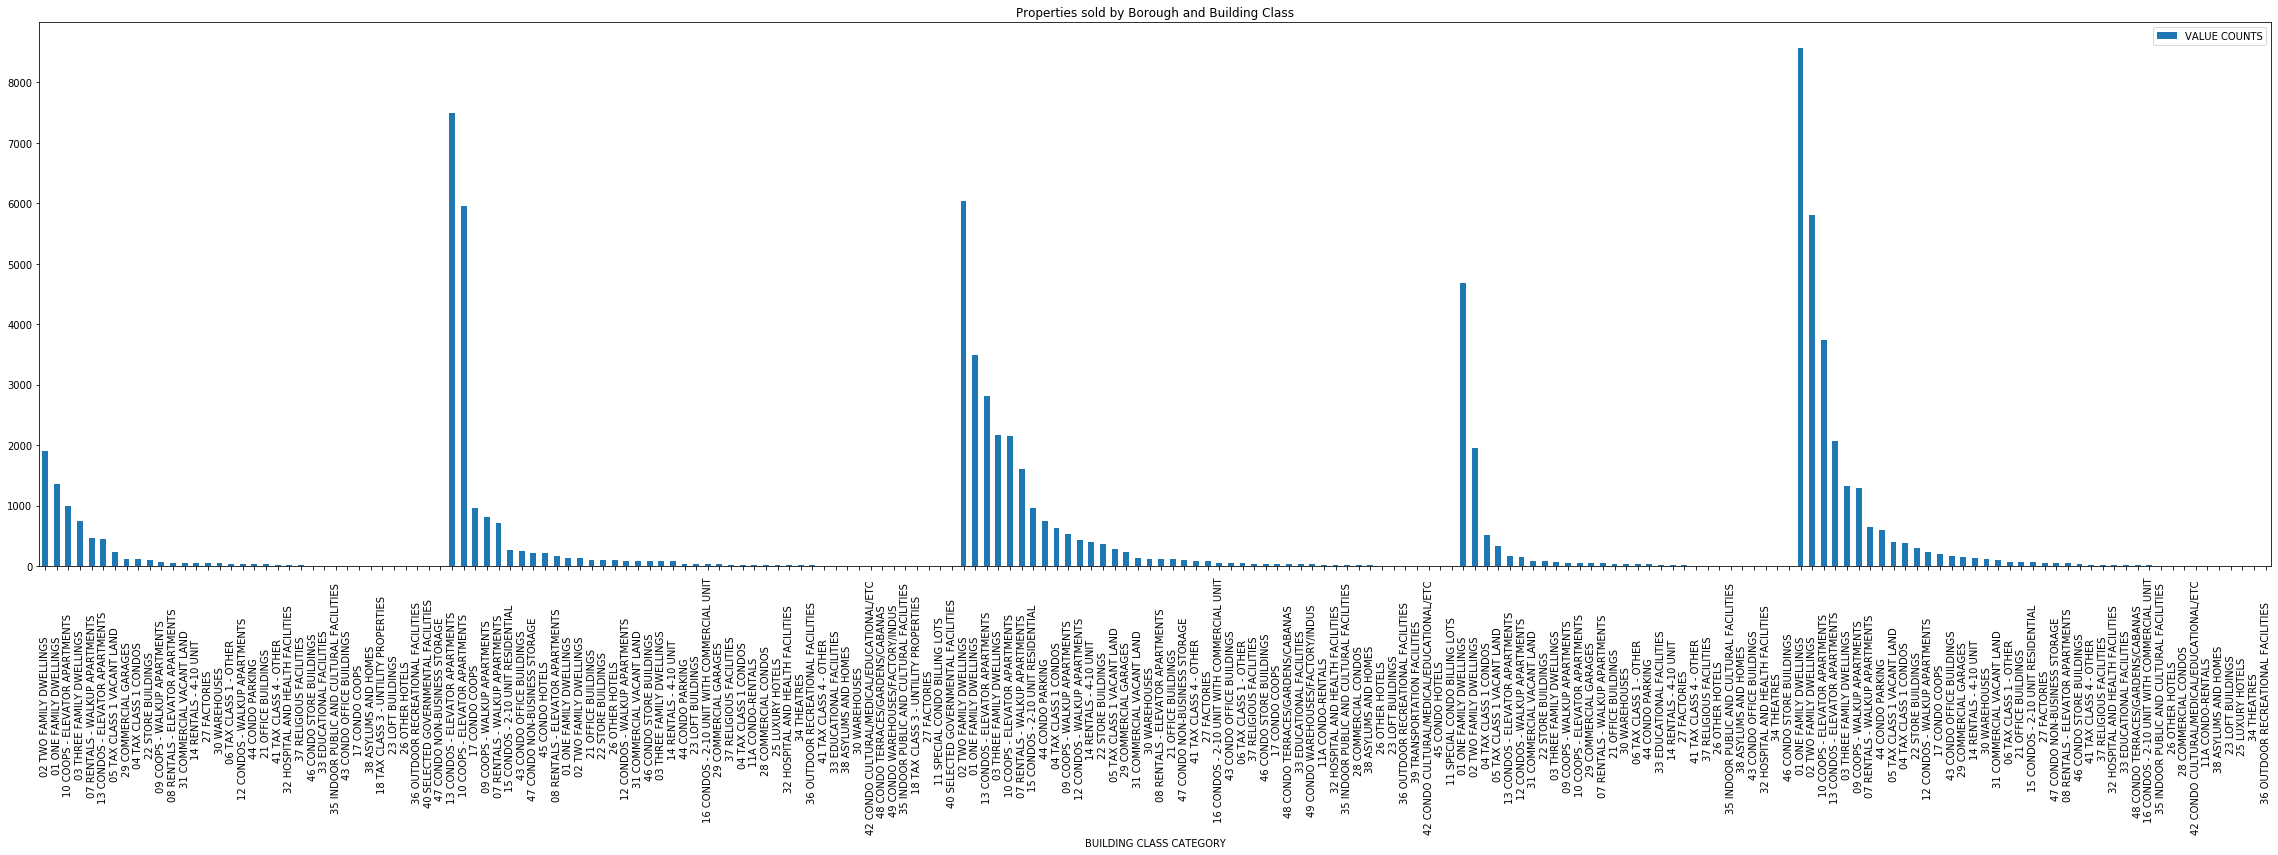

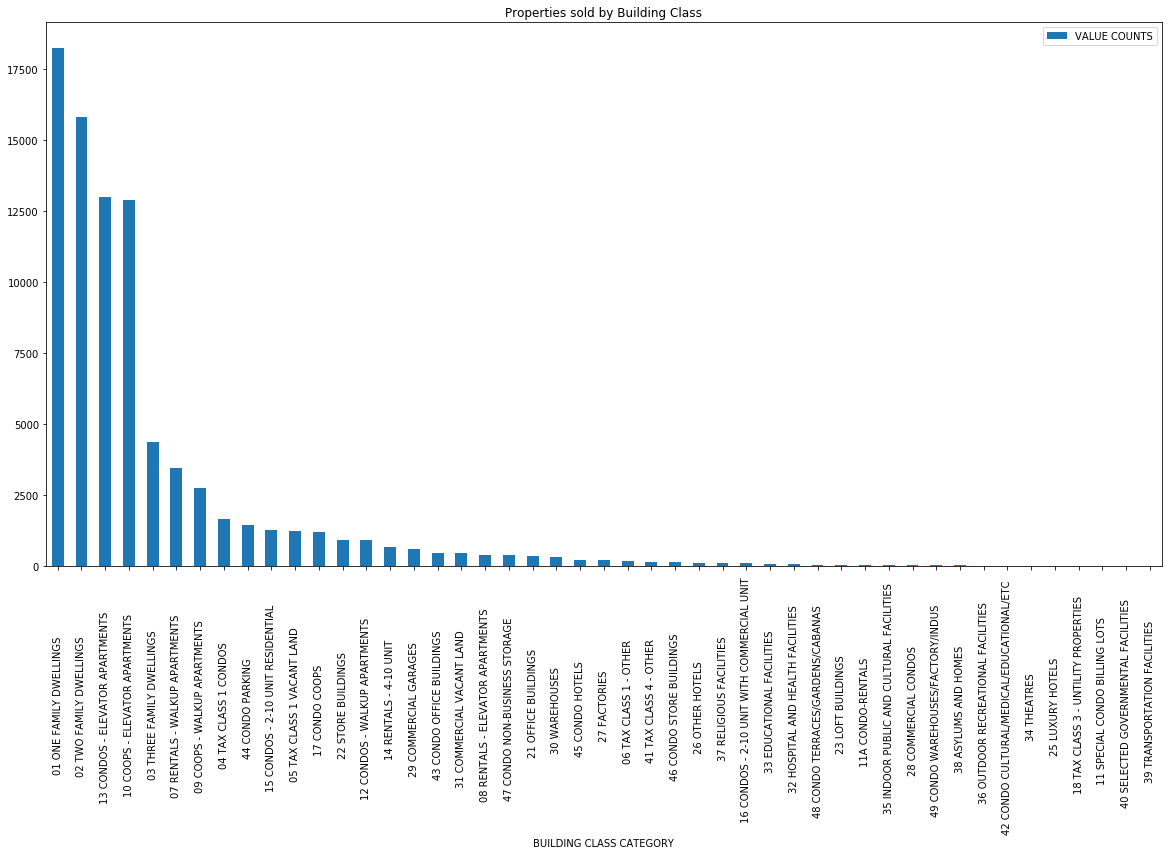

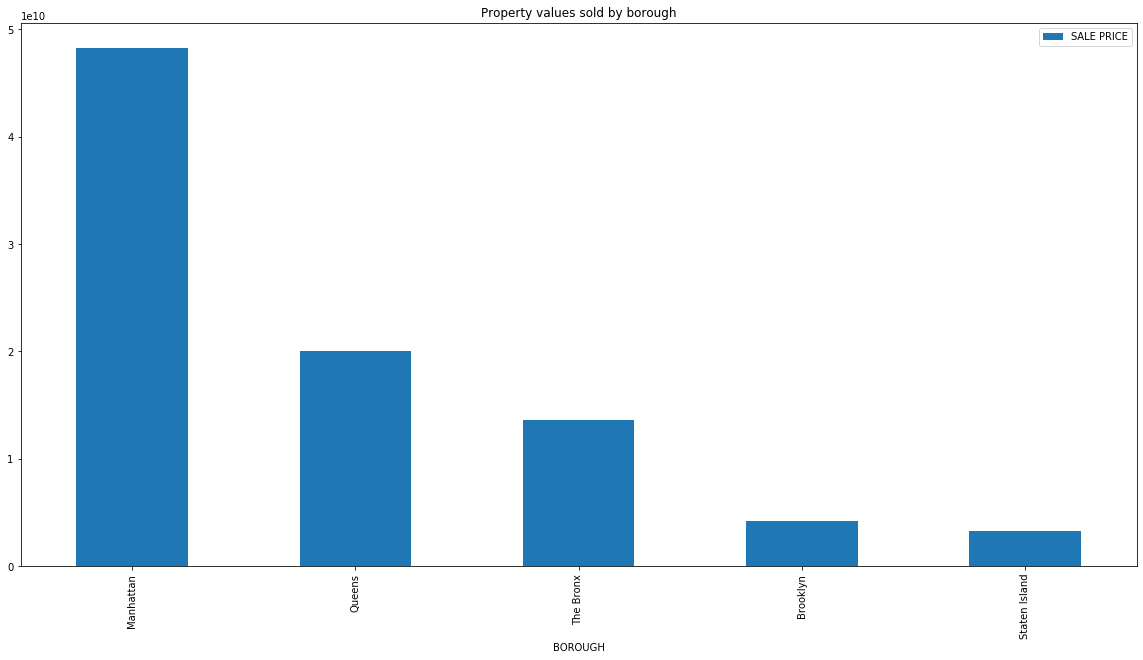

In [263]:
#Grouping by Borough and Building Class Category
sales_frame_borough = sales_frame.groupby(["BOROUGH"])
groupedby_borough_building_class = sales_frame_borough["BUILDING CLASS CATEGORY"].value_counts().reset_index(name="Index")
groupedby_borough_building_class.columns = ["BOROUGH", "BUILDING CLASS CATEGORY", "VALUE COUNTS"]

# Printing new dataframe
print(groupedby_borough_building_class)

# Exporting csv of sales value grouped by borough, building class category
groupedby_borough_building_class.to_csv("data/groupedby_building_class_1617.csv", index_label=["Index"])

# Visualizing and saving image
groupedby_borough_building_class.plot.bar(x="BUILDING CLASS CATEGORY", y="VALUE COUNTS", title="Properties sold by Borough and Building Class", figsize=(40,10))
plt.savefig("data/Properties sold by BBC 16_17.jpg", bbox_inches="tight")

# Grouping by Building Class Category
groupedby_building_class = sales_frame["BUILDING CLASS CATEGORY"].value_counts().reset_index(name="Index")
groupedby_building_class.columns = ["BUILDING CLASS CATEGORY", "VALUE COUNTS"]

#Printing new dataframe
#print(groupedby_building_class)

# Visualizing and saving image
groupedby_building_class.plot.bar(x="BUILDING CLASS CATEGORY", y="VALUE COUNTS", title="Properties sold by Building Class", figsize=(20,10))
plt.savefig("data/Properties sold by BC 16_17.jpg", bbox_inches="tight")

# Grouping by Borough and Building Class Category
sales_frame_borough_price = sales_frame.groupby(["BOROUGH"])
groupedby_borough_price = sales_frame_borough_price["SALE PRICE"].sum().reset_index(name="Index")
groupedby_borough_price.columns = ["BOROUGH", "SALE PRICE"]

# Sorting after highest value
groupedby_borough_price = groupedby_borough_price.sort_values("SALE PRICE", ascending=False)

# Suppressing scientific float notation
pd.options.display.float_format = "{:.2f}".format

# Printing new dataframe
print(groupedby_borough_price)

# Exporting csv of sales prices grouped by borough
groupedby_borough_price.to_csv("data/groupedby_borough_price_1617.csv", index_label=["Index"])

# Visualizing and saving image
groupedby_borough_price.plot.bar(x="BOROUGH", y="SALE PRICE", title="Property values sold by borough", figsize=(20,10))
plt.savefig("data/Property values sold by borough 16_17.jpg", bbox_inches="tight")


### 2016

In [264]:
#Calculating number of sales/mean/median and top sale in 2016
sales_2016 = sales_frame[sales_frame["SALE DATE"].dt.year == 2016]
sales_max_2016 = sales_2016["SALE PRICE"].max()
sales_mean_2016 = sales_2016["SALE PRICE"].mean()
sales_total_2016 = sales_2016["SALE PRICE"].sum()
sales_median_2016 = sales_2016["SALE PRICE"].median()

# Adjusting mean because of $0 sales
sales_2016_adj = sales_2016[sales_2016["SALE PRICE"] > 0]
sales_2016_mean_adj = sales_2016_adj["SALE PRICE"].mean()

print("The number of sales in the year 2016 was ", len(sales_2016), " with the most expensive sale price being $", int(sales_max_2016), " and the average sale being $", int(sales_mean_2016), ".", sep="")
print("\nThe adjusted mean (dataframe cleared of $0 sales) is slightly higher being $", int(sales_2016_mean_adj), ".", sep="")
print("\nThe high number of $0 sales also lowers the median sale price to $", int(sales_median_2016), ".", sep="")
print("\nThe total amount spent for property sales in 2016 was $", int(sales_total_2016), ".", sep="")

The number of sales in the year 2016 was 29493 with the most expensive sale price being $620000000 and the average sale being $1310520.

The adjusted mean (dataframe cleared of $0 sales) is slightly higher being $1558332.

The high number of $0 sales also lowers the median sale price to $495000.

The total amount spent for property sales in 2016 was $31637273303.


### 2017

In [265]:
# Calculating number of sales/mean/median and top sale in 2017
sales_2017 = sales_frame[sales_frame["SALE DATE"].dt.year == 2017]
sales_max_2017 = sales_2017["SALE PRICE"].max()
sales_mean_2017 = sales_2017["SALE PRICE"].mean()
sales_total_2017 = sales_2017["SALE PRICE"].sum()
sales_median_2017 = sales_2017["SALE PRICE"].median()

# Adjusting mean because of $0 sales
sales_2017_adj = sales_2017[sales_2017["SALE PRICE"] > 0]
sales_2017_mean_adj = sales_2017_adj["SALE PRICE"].mean()

# Printing all the results
print("The number of sales in the year 2017 was ", len(sales_2017), " with the most expensive sale being $", int(sales_max_2017), " and the average sale price being $", int(sales_mean_2017),".", sep="")
print("\nThe adjusted mean (dataframe cleared of $0 sales) is slightly higher being $", int(sales_2017_mean_adj), ".", sep="")
print("\nThe high number of $0 sales also lowers the median sale price to $", int(sales_median_2017), ".", sep="")
print("\nThe total amount spent for property sales in 2017 was $", int(sales_total_2017), ".", sep="")

The number of sales in the year 2017 was 55055 with the most expensive sale being $2210000000 and the average sale price being $1258519.

The adjusted mean (dataframe cleared of $0 sales) is slightly higher being $1462302.

The high number of $0 sales also lowers the median sale price to $550000.

The total amount spent for property sales in 2017 was $57698087606.


## Sales per Month


##### January

In [266]:
sales_jan_2016 = sales_2016[sales_2016["SALE DATE"].dt.month == 1]
print("2016:", len(sales_jan_2016))
sales_jan_2017 = sales_2017[sales_2017["SALE DATE"].dt.month == 1]
print("2017:", len(sales_jan_2017))

2016: 0
2017: 6871


##### February

In [267]:
sales_feb_2016 = sales_2016[sales_2016["SALE DATE"].dt.month == 2]
print("2016:", len(sales_feb_2016))
sales_feb_2017 = sales_2017[sales_2017["SALE DATE"].dt.month == 2]
print("2017:", len(sales_feb_2017))

2016: 0
2017: 6323


##### March

In [268]:
sales_mar_2016 = sales_2016[sales_2016["SALE DATE"].dt.month == 3]
print("2016:", len(sales_mar_2016))
sales_mar_2017 = sales_2017[sales_2017["SALE DATE"].dt.month == 3]
print("2017:", len(sales_mar_2017))

2016: 0
2017: 7705


##### April

In [269]:
sales_apr_2016 = sales_2016[sales_2016["SALE DATE"].dt.month == 4]
print("2016:", len(sales_apr_2016))
sales_apr_2017 = sales_2017[sales_2017["SALE DATE"].dt.month == 4]
print("2017:", len(sales_apr_2017))

2016: 0
2017: 6402


##### May

In [270]:
sales_may_2016 = sales_2016[sales_2016["SALE DATE"].dt.month == 5]
print("2016:", len(sales_may_2016))
sales_may_2017 = sales_2017[sales_2017["SALE DATE"].dt.month == 5]
print("2017:", len(sales_may_2017))

2016: 0
2017: 7461


##### June

In [271]:
sales_jun_2016 = sales_2016[sales_2016["SALE DATE"].dt.month == 6]
print("2016:", len(sales_jun_2016))
sales_jun_2017 = sales_2017[sales_2017["SALE DATE"].dt.month == 6]
print("2017:", len(sales_jun_2017))

2016: 0
2017: 8293


##### July

In [272]:
sales_jul_2016 = sales_2016[sales_2016["SALE DATE"].dt.month == 7]
print("2016:", len(sales_jul_2016))
sales_jul_2017 = sales_2017[sales_2017["SALE DATE"].dt.month == 7]
print("2017:", len(sales_jul_2017))

2016: 0
2017: 6319


##### August

In [273]:
sales_aug_2016 = sales_2016[sales_2016["SALE DATE"].dt.month == 8]
print("2016:", len(sales_aug_2016))
sales_aug_2017 = sales_2017[sales_2017["SALE DATE"].dt.month == 8]
print("2017:", len(sales_aug_2017))

2016: 0
2017: 5681


##### September

In [274]:
sales_sep_2016 = sales_2016[sales_2016["SALE DATE"].dt.month == 9]
print("2016:", len(sales_sep_2016))
sales_sep_2017 = sales_2017[sales_2017["SALE DATE"].dt.month == 9]
print("2017:", len(sales_sep_2017))

2016: 7779
2017: 0


##### October

In [275]:
sales_oct_2016 = sales_2016[sales_2016["SALE DATE"].dt.month == 10]
print("2016:", len(sales_oct_2016))
sales_oct_2017 = sales_2017[sales_2017["SALE DATE"].dt.month == 10]
print("2017:", len(sales_oct_2017))

2016: 6751
2017: 0


##### November

In [276]:
sales_nov_2016 = sales_2016[sales_2016["SALE DATE"].dt.month == 11]
print("2016:", len(sales_nov_2016))
sales_nov_2017 = sales_2017[sales_2017["SALE DATE"].dt.month == 11]
print("2017:", len(sales_nov_2017))

2016: 7072
2017: 0


##### December

In [277]:
sales_dec_2016 = sales_2016[sales_2016["SALE DATE"].dt.month == 12]
print("2016:", len(sales_dec_2016))
sales_dec_2017 = sales_2017[sales_2017["SALE DATE"].dt.month == 12]
print("2017:", len(sales_dec_2017))

2016: 7891
2017: 0


## Transactions without Sale Price

The number of property sales with a sale price of $0 is 10228.
The number of all property sales is 84548.
This equals to about 12.1%


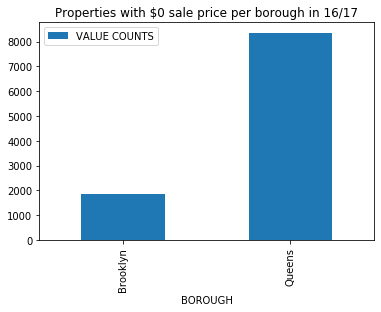

In [278]:
# Calculating sales without sale price
sales_zero = sales_frame[sales_frame["SALE PRICE"] == 0]
print("The number of property sales with a sale price of $0 is ", len(sales_zero), ".", sep="")

# Measuring total number of sales
print("The number of all property sales is ", len(sales_frame), ".", sep="")

# Sales without sale price in relation to all sales
sales_zero_percent = len(sales_frame[sales_frame["SALE PRICE"] == 0]) / len(sales_frame)
print("This equals to about ", round(sales_zero_percent * 100, 2), "%", sep="")

# Filtering dataframe "sales_zero" by borough
sales_zero_borough = sales_zero.groupby(["BOROUGH"])
groupedby_zero_borough = sales_zero_borough["SALE PRICE"].value_counts().reset_index(name="Index")
groupedby_zero_borough.columns = ["BOROUGH", "SALE PRICE", "VALUE COUNTS"]

# Printing new dataframe
#print(groupedby_zero_borough)

# Visualizing and saving image
groupedby_zero_borough.plot.bar(x="BOROUGH", y="VALUE COUNTS", title="Properties with $0 sale price per borough in 16/17")

plt.savefig("data/Properties with $0 sale price per borough 16_17.jpg", bbox_inches="tight")

#### Reasons for that

In [279]:
# Reasons for sale price of $0
print("\nA $0 sale indicates that there was a transfer of ownership without cash consideration. \nThere can be a number of reasons for that, for example transfers of ownership from parents to children.")
sales_almost_zero = sales_frame[(sales_frame["SALE PRICE"] < 100) & sales_frame["SALE PRICE"] != 0]
print("\nThere is also a small number of sales (", len(sales_almost_zero), ") that were made for insignificant values (for example < $100), which suggests the same as above.", sep="")


A $0 sale indicates that there was a transfer of ownership without cash consideration. 
There can be a number of reasons for that, for example transfers of ownership from parents to children.

There is also a small number of sales (912) that were made for insignificant values (for example < $100), which suggests the same as above.


## Locations of properties


### Sales in different boroughs

In [280]:
# Sorting the sales by boroughs
sales_manhattan = sales_frame[sales_frame["BOROUGH"] == "Manhattan"]
sales_brooklyn = sales_frame[sales_frame["BOROUGH"] == "Queens"]
sales_queens = sales_frame[sales_frame["BOROUGH"] == "Brooklyn"]
sales_the_bronx = sales_frame[sales_frame["BOROUGH"] == "The Bronx"]
sales_staten_island = sales_frame[sales_frame["BOROUGH"] == "Staten Island"]
print("(1) Manhattan:", len(sales_manhattan))
print("(2) Brooklyn:", len(sales_brooklyn))
print("(3) Queens:", len(sales_queens))
print("(4) The Bronx:", len(sales_the_bronx))
print("(5) Staten Island:", len(sales_staten_island))

(1) Manhattan: 18306
(2) Brooklyn: 24047
(3) Queens: 7049
(4) The Bronx: 26736
(5) Staten Island: 8410


### Sales in different neighborhoods


#### Top in Manhattan

In [281]:
sales_m_neighbor = sales_manhattan["NEIGHBORHOOD"].value_counts()
print(sales_m_neighbor.nlargest(10))

UPPER EAST SIDE (59-79)      1736
UPPER EAST SIDE (79-96)      1590
UPPER WEST SIDE (59-79)      1439
MIDTOWN EAST                 1418
UPPER WEST SIDE (79-96)      1004
MIDTOWN WEST                  918
HARLEM-CENTRAL                847
CHELSEA                       803
TRIBECA                       655
GREENWICH VILLAGE-CENTRAL     638
Name: NEIGHBORHOOD, dtype: int64


#### Top in Brooklyn

In [282]:
sales_b_neighbor = sales_brooklyn["NEIGHBORHOOD"].value_counts()
print(sales_b_neighbor.nlargest(10))

BEDFORD STUYVESANT    1436
BOROUGH PARK          1245
SHEEPSHEAD BAY        1013
EAST NEW YORK          982
FLATBUSH-EAST          846
BAY RIDGE              832
CROWN HEIGHTS          793
CANARSIE               783
BUSHWICK               769
PARK SLOPE             706
Name: NEIGHBORHOOD, dtype: int64


#### Top in Queens

In [283]:
sales_q_neighbor = sales_queens["NEIGHBORHOOD"].value_counts()
print(sales_q_neighbor.nlargest(10))

RIVERDALE                   647
SOUNDVIEW                   499
PARKCHESTER                 455
WILLIAMSBRIDGE              440
BAYCHESTER                  436
MORRISANIA/LONGWOOD         358
THROGS NECK                 352
BRONXDALE                   332
MORRIS PARK/VAN NEST        276
SCHUYLERVILLE/PELHAM BAY    264
Name: NEIGHBORHOOD, dtype: int64


#### Top in The Bronx

In [284]:
sales_tb_neighbor = sales_the_bronx["NEIGHBORHOOD"].value_counts()
print(sales_tb_neighbor.nlargest(10))

FLUSHING-NORTH     3068
ASTORIA            1216
BAYSIDE            1150
FOREST HILLS       1069
JACKSON HEIGHTS     992
FLUSHING-SOUTH      918
ELMHURST            802
RICHMOND HILL       749
REGO PARK           721
CORONA              647
Name: NEIGHBORHOOD, dtype: int64


#### Top in Staten Island

In [285]:
sales_si_neighbor = sales_staten_island["NEIGHBORHOOD"].value_counts()
print(sales_si_neighbor.nlargest(10))

GREAT KILLS          776
NEW SPRINGVILLE      590
BULLS HEAD           393
ELTINGVILLE          345
MIDLAND BEACH        316
WEST NEW BRIGHTON    315
PORT RICHMOND        288
ARDEN HEIGHTS        278
MARINERS HARBOR      273
WESTERLEIGH          267
Name: NEIGHBORHOOD, dtype: int64


### Buildings sold per building class

In [286]:
# Sales per building class category
sales_per_building_class = sales_frame["BUILDING CLASS CATEGORY"].value_counts()
print(sales_per_building_class)

# Grouping sales by borough, neighborhood and building class category
sales_grouped = sales_frame.groupby(['BOROUGH','NEIGHBORHOOD', 'BUILDING CLASS CATEGORY']).sum()
columns_del = [ "BLOCK", "LOT", "ZIP CODE", "RESIDENTIAL UNITS", "COMMERCIAL UNITS", "TOTAL UNITS", "YEAR BUILT", "TAX CLASS AT TIME OF SALE"]
sales_grouped = sales_grouped.drop(columns_del, 1)
sales_grouped_desc = sales_grouped.sort_values(by=["SALE PRICE"], ascending=False)
print(sales_grouped_desc)

#exporting csv of sales value grouped by borough, neighborhood, building class category
sales_grouped_desc.to_csv("data/grouped_sales.csv", index_label=["BOROUGH", "NEIGHBORHOOD", "BUILDING CLASS CATEGORY"])


01 ONE FAMILY DWELLINGS                         18235
02 TWO FAMILY DWELLINGS                         15828
13 CONDOS - ELEVATOR APARTMENTS                 12989
10 COOPS - ELEVATOR APARTMENTS                  12902
03 THREE FAMILY DWELLINGS                        4384
07 RENTALS - WALKUP APARTMENTS                   3466
09 COOPS - WALKUP APARTMENTS                     2767
04 TAX CLASS 1 CONDOS                            1656
44 CONDO PARKING                                 1441
15 CONDOS - 2-10 UNIT RESIDENTIAL                1281
05 TAX CLASS 1 VACANT LAND                       1248
17 CONDO COOPS                                   1201
22 STORE BUILDINGS                                935
12 CONDOS - WALKUP APARTMENTS                     926
14 RENTALS - 4-10 UNIT                            671
29 COMMERCIAL GARAGES                             587
43 CONDO OFFICE BUILDINGS                         475
31 COMMERCIAL VACANT LAND                         463
08 RENTALS - ELEVATOR APARTM